# XOR 게이트
#### 1) 패키지 참조하기

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential      # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense           # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop     # 옵티마이저, (학습방식에 대한 효율성)
from tensorflow.keras.losses import mse             # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

#### 2) 데이터 셋 준비하기 

랜덤 시드값 고정

In [2]:
np.random.seed(777)

데이터 셋 구성

> ###### XOR 회로는 입력값이 동일한 경우 False, 입력값이 서로 다른경우 True

In [3]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [0]])

#### 3) 데이터 전처리

- 간단한 데이터 이므로 이 예제는 수행하지 않는다.

#### 4) 탐색적 데이터 분석

In [4]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


#### 5) 데이터 셋 분할하기

- 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

#### 6) 모델 개발

모델 정의

In [5]:
model = Sequential()
model.add(Dense(16, input_shape=(2, ), activation='relu')) # 처음 입력시 relu 무엇을 할 지 모를 때
# 2개의 입력값, 16계층을 쌓기 처음 2개의 입력값에 대한 16개의 답 점점 줄여나갈 것 16->8->4->2->1
# 16여기에 들어갈 숫자가 가장 최적화 된 숫자가 무엇인지 찾아내는 것이 어려움
# model.add(Dense(2, input_shape=(2, ), activation='relu')) -> 정확도 50에서 끝
# model.add(Dense(8, input_shape=(2, ), activation='relu')) -> 정확도 75에서 끝
# model.add(Dense(32, input_shape=(2, ), activation='relu')) -> 층이 16이나 32인 경우 정확도 100
# model.add(Dense(128, input_shape=(2, ), activation='relu')) -> 변수가 많아질 경우 Dense값에 따른 컴퓨터 처리에 부담이 될 수 있다.
model.add(Dense(1, activation ='sigmoid')) # 단순분류 sigmoid, linear = 단순선형회귀
model.compile(optimizer= RMSprop(), loss=mse, metrics = ['acc'])
# optimizer=adam(가장 최신)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [6]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df
# 학습층을 1개로 설정한 경우 끝내 정확도가 50퍼센트만 나옴
# 확인 후 층을 계속 설정하여본다. 2의 배수로

Epoch 1/500
1/1 [==============================] - 0s 320ms/step - loss: 0.2594 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2579 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2568 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2559 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2551 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2544 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2537 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2531 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2525 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2519 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.251

,loss,acc
epochs,,
1,0.259364,0.75
2,0.257938,0.75
3,0.256788,0.75
4,0.255892,0.75
5,0.255096,0.75
...,...,...
496,0.115212,1.00
497,0.115014,1.00
498,0.114673,1.00


#### 7) 학습 결과 평가

학습 결과 시각화

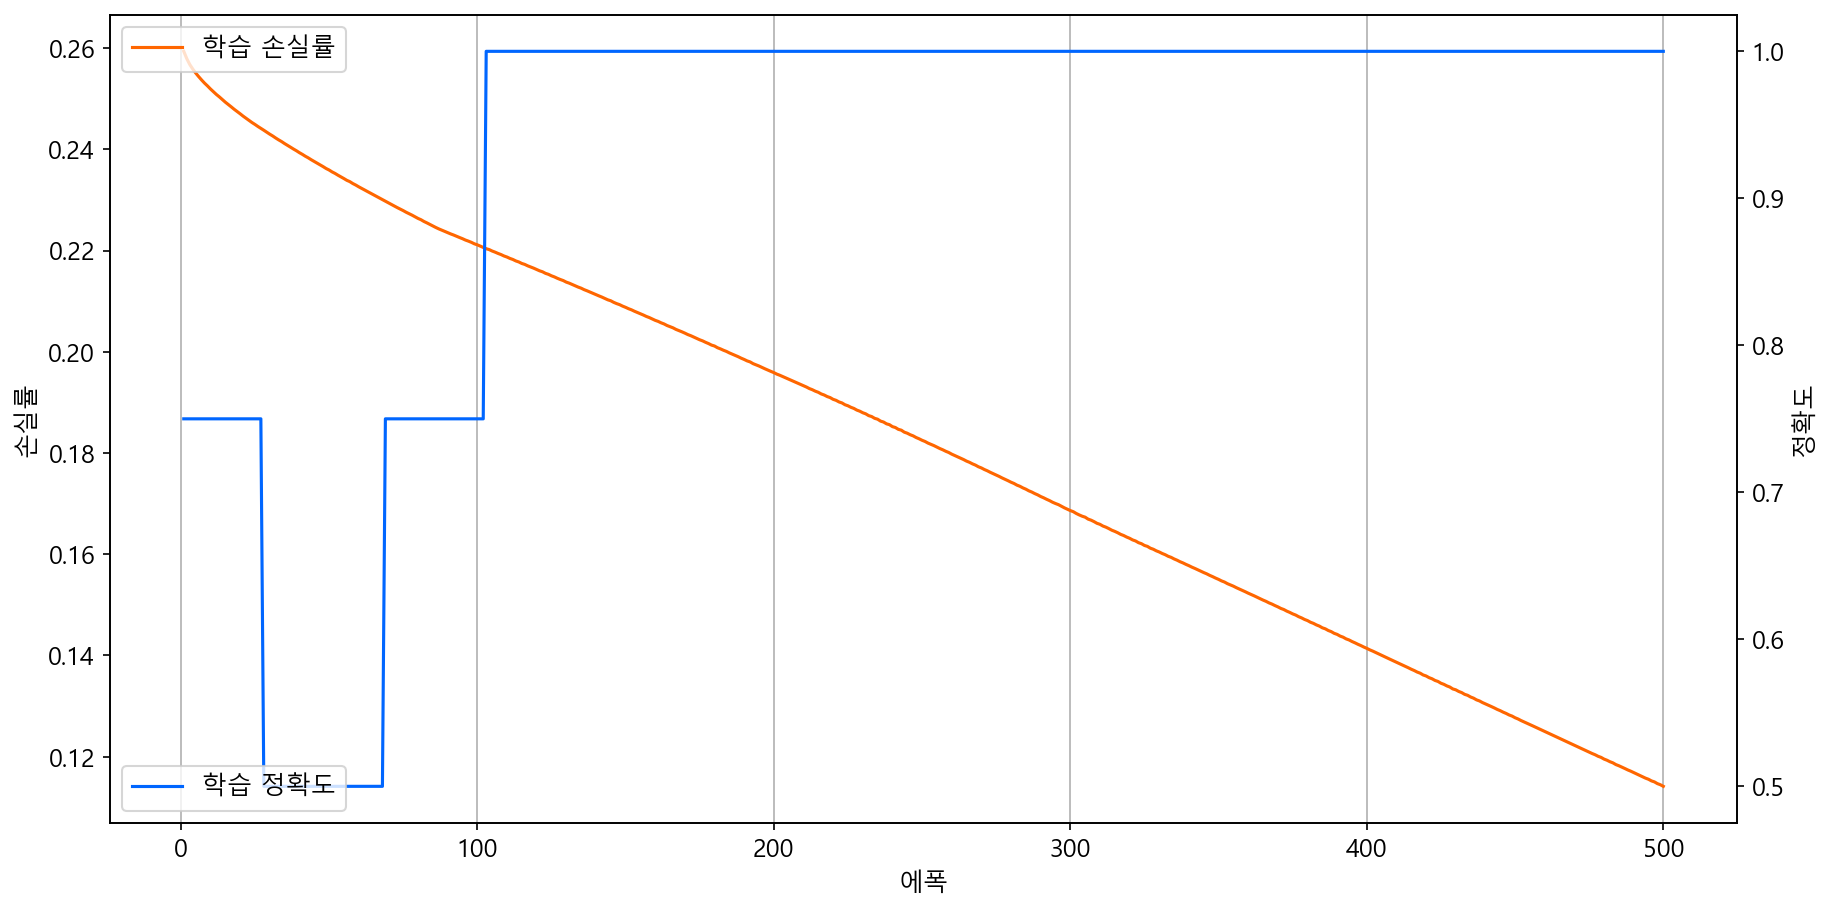

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

모델 성능 평가

In [8]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

1/1 [==============================] - 0s 145ms/step - loss: 0.1139 - acc: 1.0000
손실률: 0.11%, 정확도: 1.00%


가중치, 평향 확인

In [9]:
weights = model.get_weights()
weights

[array([[-0.1109857 ,  0.5144686 ,  0.04126194, -0.5282426 ,  0.59795225,
          0.00105817,  0.6560778 ,  0.46688282,  0.09124807,  0.4848505 ,
         -0.09101582,  0.1376269 ,  0.43985748, -0.56211865, -0.637606  ,
          0.3772804 ],
        [-0.4495432 , -0.25159425,  0.7139243 ,  0.5286017 , -0.59671557,
         -0.4088263 , -0.6550211 , -0.46618876, -0.00771358, -0.4860862 ,
         -0.4075203 ,  0.31975728,  0.4410185 ,  0.19407554,  0.6381009 ,
          0.4182631 ]], dtype=float32),
 array([ 0.0000000e+00,  2.8624049e-01, -1.7776167e-04, -8.2583784e-04,
         2.5500432e-05, -2.9747414e-03,  2.6588712e-04,  9.4015559e-04,
         2.4691385e-01, -6.5358996e-04,  0.0000000e+00,  2.2287422e-03,
        -4.4054943e-01, -1.9522637e-01, -5.0444237e-04,  2.7544258e-04],
       dtype=float32),
 array([[ 0.13985056],
        [-0.67512816],
        [ 0.37234578],
        [ 0.83098865],
        [ 0.701264  ],
        [-0.06102118],
        [ 0.71955407],
        [ 0.7694847 

In [10]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


#### 8) 학습 결과 적용

In [11]:
r = model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 66ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
